In [ ]:
#Packages
!pip install BeautifulSoup4
!pip install lxml
!pip install html5lib
!pip install nltk==3.2.5
!pip install pdfplumber
!pip install -U spacy
!python -m spacy download en
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.2.5-py3-none-any.whl size=1392141 sha256=38215ea3eeff8b66bd3f218743df28f2639a68e9fddaaeaba1e312c8d8f0d74c
  Stored in directory: /root/.cache/pip/wheels/50/d6/35/4a8a48ea9fe03abae30da7971b8ed2a350436bebc00541372b
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 26.0 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.4
    Uninstalling spacy-3.7.4:
      Successfully uninstalled spac

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from collections import Counter
from nltk.corpus import stopwords
import spacy
from html import unescape
import pdfplumber
from datetime import datetime
import datetime as dt

import urllib
import urllib.request
from bs4 import BeautifulSoup
from bs4 import re
import requests
import re
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from google.colab import files

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.tokenize import word_tokenize

#Modelul SpaCy
nlp = spacy.load("en_core_web_sm")

# Adaugare stop words la cele de la SpaCy
all_stopwords = nlp.Defaults.stop_words
custom_stopwords = {'the', 'is', 'th', 's', 'm', 'would'}
all_stopwords |= custom_stopwords

# Tokenizare cu NLTK si eliminare de stopwords cu SpaCy
def tokenize_and_remove_stopwords(text):

    word_tokens = word_tokenize(text)

    filtered_sentence = [word for word in word_tokens if word.lower() not in all_stopwords]
    return filtered_sentence

#Test
text = "This is an example sentence demonstrating the use of spaCy and NLTK."
filtered_text = tokenize_and_remove_stopwords(text)
print(filtered_text)

['example', 'sentence', 'demonstrating', 'use', 'spaCy', 'NLTK', '.']


In [ ]:
def my_preprocessor(doc):
  return(unescape(doc).lower())

In [ ]:
def my_tokenizer(doc):

    text = word_tokenize(doc)
    tokens_without_sw= [word for word in text if not word in all_stopwords]

    return tokens_without_sw

In [ ]:
def preprocess_tokens(tokens):
  '''
  Remove any extra lines, non-letter characters, and blank quotes
  '''
  remove_new_lines = [re.sub('\s+', '', token) for token in tokens]
  #Non letter characters - eliminare
  non_letters = [re.sub('[^a-zA-Z]', '', remove_new_line) for remove_new_line in remove_new_lines]
  #Sistracting single quotes - eliminare
  remove_quotes = [re.sub("\'", '', non_letter) for non_letter in non_letters]
  #Empty strings from a list of strings - eliminare
  final = list(filter(None, remove_quotes))

  return final

In [ ]:
def concat_text(text):
    x=''
    for i in text:
        x = x+i
    return x

In [ ]:
def get_text(path):
  docs = []
  with pdfplumber.open(path) as pdf:
    for i in range(len(pdf.pages)):
      page = pdf.pages[i]
      text = page.extract_text()
      docs.append(text)
    concat = concat_text(docs)
  return concat

In [ ]:
def get_text(path):  #file is the path
  docs = []
  with pdfplumber.open(path) as pdf:
    for i in range(len(pdf.pages)):
      page = pdf.pages[i]
      text = page.extract_text()
      docs.append(text)
    concat = concat_text(docs)
  return concat

In [ ]:
def get_words(full_text):

  raw = [word.lower() for word in full_text.split()]

  values = ','.join(map(str, raw))  #converts bytes object to string
  tokenizer = my_tokenizer(values)

  words = preprocess_tokens(tokenizer)
  # remove stopwords
  stops = nltk.corpus.stopwords.words('english')
  new_stopwords = ['chairman','would', 'mr']
  stops.extend(new_stopwords)
  words = [word for word in words if word not in stops]
  counter = Counter()
  counter.update(words)
  most_common = counter.most_common(25)

  return words, most_common

In [ ]:
path_to_local_pdf = True

if path_to_local_pdf or path_to_local_txt:
    base_directory = "/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/"

In [ ]:
link1 = '/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/2000/FOMC20000201meeting.pdf'
link2 = '/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/1980/FOMC19800109meeting.pdf'
link3 = '/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/1982/FOMC19820701meeting.pdf'

text = (get_text(link3))

len(text)

6382

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
import re

# generates a dictionary of transcript paths
# if we already have the pdf data, set path_to_local_pdf to True.
link_to_file_on_website = False
path_to_local_pdf = True

if link_to_file_on_website:
    base_url = "https://www.federalreserve.gov/monetarypolicy/"
if path_to_local_pdf or path_to_local_txt:
    base_directory = "/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/"

transcript_links = {}
for year in range(1972, 2025):

    if link_to_file_on_website:
        path = "fomchistorical" + str(year) + ".htm"
        html_doc = requests.get(base_url + path)
        soup = BeautifulSoup(html_doc.content, 'html.parser')
        links = soup.find_all("a", string=re.compile('Transcript .*'))
        link_base_url = "https://www.federalreserve.gov"
        transcript_links[str(year)] = [link_base_url + link["href"] for link in links]

    elif path_to_local_pdf or path_to_local_txt:
        files = []
        path_to_folder = base_directory + str(year)
        new_files = os.walk(path_to_folder)
        for file in new_files:
            for f in file[2]:
                if path_to_local_pdf:
                    if f[-11:] == "meeting.pdf":
                      files.append(str(file[0]) + "/" + f)
        transcript_links[str(year)] = files
    print("Year Complete: ", year)

Dates, transcripts, all_words, top_tokens = [],[],[],[]

Year Complete:  1972
Year Complete:  1973
Year Complete:  1974
Year Complete:  1975
Year Complete:  1976
Year Complete:  1977
Year Complete:  1978
Year Complete:  1979
Year Complete:  1980
Year Complete:  1981
Year Complete:  1982
Year Complete:  1983
Year Complete:  1984
Year Complete:  1985
Year Complete:  1986
Year Complete:  1987
Year Complete:  1988
Year Complete:  1989
Year Complete:  1990
Year Complete:  1991
Year Complete:  1992
Year Complete:  1993
Year Complete:  1994
Year Complete:  1995
Year Complete:  1996
Year Complete:  1997
Year Complete:  1998
Year Complete:  1999
Year Complete:  2000
Year Complete:  2001
Year Complete:  2002
Year Complete:  2003
Year Complete:  2004
Year Complete:  2005
Year Complete:  2006
Year Complete:  2007
Year Complete:  2008
Year Complete:  2009
Year Complete:  2010
Year Complete:  2011
Year Complete:  2012
Year Complete:  2013
Year Complete:  2014
Year Complete:  2015
Year Complete:  2016
Year Complete:  2017
Year Complete:  2018
Year Complete

In [ ]:
pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from datetime import datetime

# Assuming get_text and get_words functions are defined elsewhere

# Lists to hold the data points
Dates = []
transcripts = []
all_words = []
top_tokens = []

# Iterate over each year
for year in transcript_links:
    if int(year) >= 2025:
        continue

    # Sort the files based on the date in the file name
    sorted_files = sorted(transcript_links[year], key=lambda x: datetime.strptime(x[-19:-11], '%Y%m%d'))

    # Process each file in the sorted list
    for file in sorted_files:
        print(file)
        text = get_text(file)
        words = get_words(text)

        # Append data points to respective lists
        Dates.append(datetime.strptime(file[-19:-11], '%Y%m%d').date())
        transcripts.append(text)
        all_words.append(words[0])
        top_tokens.append(words[1])

# Formatting data into dataframe
Data = pd.DataFrame({
    'Date': Dates,
    'Transcript': transcripts,
    'all_words': all_words,
    'top_tokens': top_tokens
})

Data.set_index('Date', inplace=True)
Data.sort_index(inplace=True)

# Save the dataframe to a CSV file
Data.to_csv('/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/fomc_transcript_tokens_from_1972.csv', header=True)


/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/1972/FOMC19720111meeting.pdf
/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/1972/FOMC19720321meeting.pdf
/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/1972/FOMC19720523meeting.pdf
/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/1972/FOMC19720620meeting.pdf
/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/1972/FOMC19720815meeting.pdf
/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/1972/FOMC19720919meeting.pdf
/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/1972/FOMC19721017meeting.pdf
/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/1972/FOMC19721219meeting.pdf
/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/1973/FOMC19730116meeting.pdf
/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/1973/FOMC19730320meeting.pdf
/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/fed

In [ ]:
import pandas as pd

# Path to the CSV file on your local machine or cloud storage
data_path = '/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/fomc_transcript_tokens_from_1972.csv'

# Load the data
data = pd.read_csv(data_path, parse_dates=['Date'], index_col='Date')

# Display the first 10 rows of the Date column
print(data.index[:10])


DatetimeIndex(['1972-01-11', '1972-03-21', '1972-05-23', '1972-06-20',
               '1972-08-15', '1972-09-19', '1972-10-17', '1972-12-19',
               '1973-01-16', '1973-03-20'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [ ]:
print(data.index[:10])

DatetimeIndex(['1972-01-11', '1972-03-21', '1972-05-23', '1972-06-20',
               '1972-08-15', '1972-09-19', '1972-10-17', '1972-12-19',
               '1973-01-16', '1973-03-20'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [ ]:
# Count the number of rows
row_count = data.shape[0]

# Display the row count
print(f'The number of rows in the data set is: {row_count}')

The number of rows in the data set is: 447


In [ ]:
import pandas as pd

# Assuming Data is already loaded and contains the 'top_tokens' column

# Create a DataFrame to store word counts
word_df = pd.DataFrame(columns=['Words', 'Count'])

for i in range(len(data)):  # total links
    word_count = {'Words': [], 'Count': []}
    top_tokens = data['top_tokens'][i]

    # Check if top_tokens is a string that needs conversion
    if isinstance(top_tokens, str):
        # Attempt to safely convert string to list of tuples
        import ast
        try:
            top_tokens = ast.literal_eval(top_tokens)
        except (ValueError, SyntaxError):
            print(f"Skipping invalid top_tokens at index {i}: {top_tokens}")
            continue

    # Process each set of top tokens
    for sets in top_tokens:
        print(f"Processing: {sets}")  # Debug print
        if isinstance(sets, (list, tuple)) and len(sets) == 2:
            word_count['Words'].append(sets[0])  # total words broken out
            word_count['Count'].append(sets[1])  # total count per word
        else:
            print(f"Skipping invalid sets at index {i}: {sets}")

    word_df1 = pd.DataFrame(word_count)
    word_df = pd.concat([word_df, word_df1], ignore_index=True)

# Group by words and sum the counts
total_words = word_df.groupby(['Words']).sum()

# Sort by count in descending order and get the top 25 words
sorted_top_words = total_words.sort_values(by='Count', ascending=False).head(25)

print(sorted_top_words)


Streaming output truncated to the last 5000 lines.
Processing: ('federal', 38)
Processing: ('open', 30)
Processing: ('members', 29)
Processing: ('markets', 27)
Processing: ('growth', 27)
Processing: ('inflation', 27)
Processing: ('prices', 27)
Processing: ('period', 25)
Processing: ('economic', 25)
Processing: ('reserve', 24)
Processing: ('recent', 23)
Processing: ('year', 22)
Processing: ('quarter', 22)
Processing: ('transactions', 21)
Processing: ('months', 21)
Processing: ('meeting', 20)
Processing: ('july', 19)
Processing: ('new', 18)
Processing: ('operations', 18)
Processing: ('system', 17)
Processing: ('securities', 17)
Processing: ('agreements', 17)
Processing: ('remained', 17)
Processing: ('committee', 32)
Processing: ('inflation', 28)
Processing: ('prices', 26)
Processing: ('members', 22)
Processing: ('growth', 22)
Processing: ('period', 20)
Processing: ('year', 20)
Processing: ('market', 18)
Processing: ('meeting', 17)
Processing: ('markets', 17)
Processing: ('continued', 17)

In [ ]:
print(data.columns)

Index(['Transcript', 'all_words', 'top_tokens'], dtype='object')


In [ ]:
import pandas as pd
import ast

# Initialize a dictionary to hold word counts by year
word_counts_by_year = {}

# Define the list of words to include
words_to_include = [
    "market", "inflation", "rate", "economic", "growth", "policy", "reserve", "open",
    "monetary", "bank", "projections", "prices", "foreign", "period", "quarter",
    "financial", "system"
]

# Process each entry in the data
for date, row in data.iterrows():
    year = date.year
    top_tokens = row['top_tokens']

    # Check if top_tokens is a string that needs conversion
    if isinstance(top_tokens, str):
        try:
            top_tokens = ast.literal_eval(top_tokens)
        except (ValueError, SyntaxError):
            continue

    # Initialize the year's dictionary if not already present
    if year not in word_counts_by_year:
        word_counts_by_year[year] = {word: 0 for word in words_to_include}

    # Count words
    for sets in top_tokens:
        if isinstance(sets, (list, tuple)) and len(sets) == 2:
            word, count = sets
            if word in words_to_include:
                word_counts_by_year[year][word] += count

# Create a DataFrame from the dictionary
word_counts_df = pd.DataFrame.from_dict(word_counts_by_year, orient='index').fillna(0)
word_counts_df = word_counts_df.T  # Transpose to have words as rows and years as columns

# Save the DataFrame to an Excel file
excel_path = '/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/word_counts_by_year.xlsx'
word_counts_df.to_excel(excel_path)

# Provide a link to download the Excel file
import shutil
shutil.copy(excel_path, 'word_counts_by_year.xlsx')


'word_counts_by_year.xlsx'

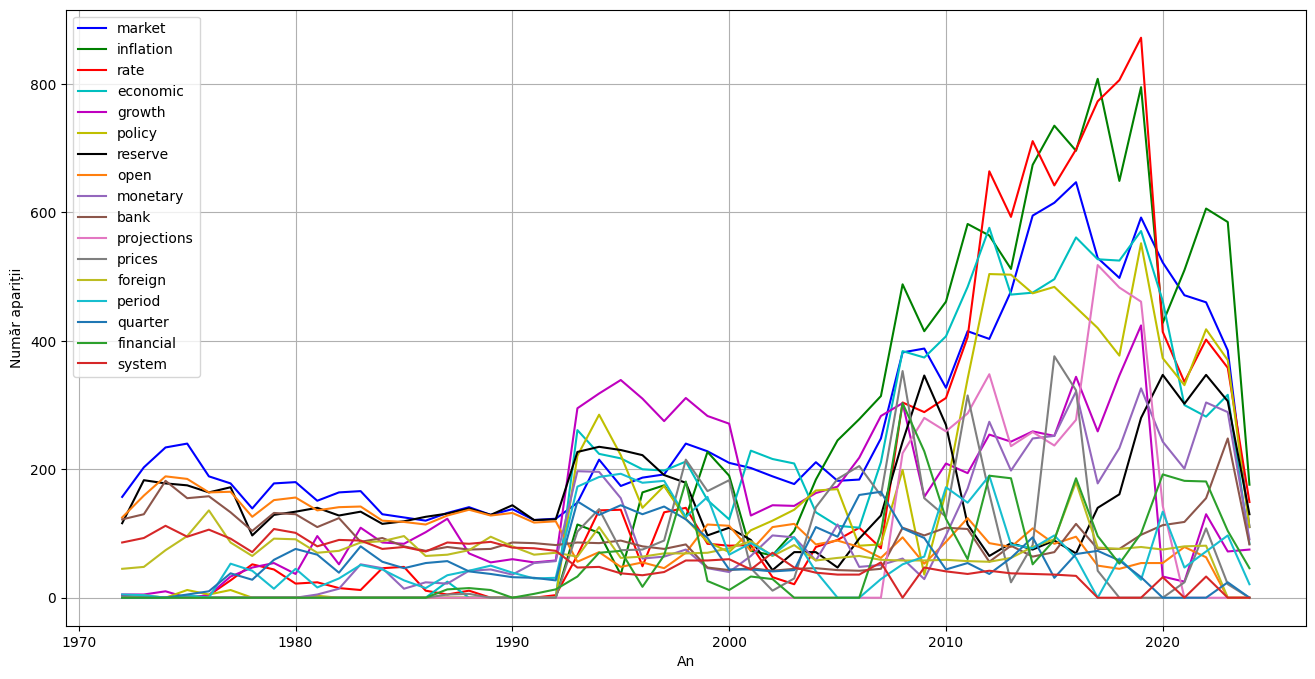

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming word_counts_df is already defined as in previous code

# Plot each word with different colors
plt.figure(figsize=(16, 8))

# Define a list of colors for the plot lines
colors = [
    'b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:purple', 'tab:brown',
    'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:blue', 'tab:green',
    'tab:red'
]

for i, word in enumerate(word_counts_df.index):
    plt.plot(word_counts_df.columns, word_counts_df.loc[word], label=word, color=colors[i % len(colors)])

plt.title('')
plt.xlabel('An')
plt.ylabel('Număr apariții')
plt.legend()
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

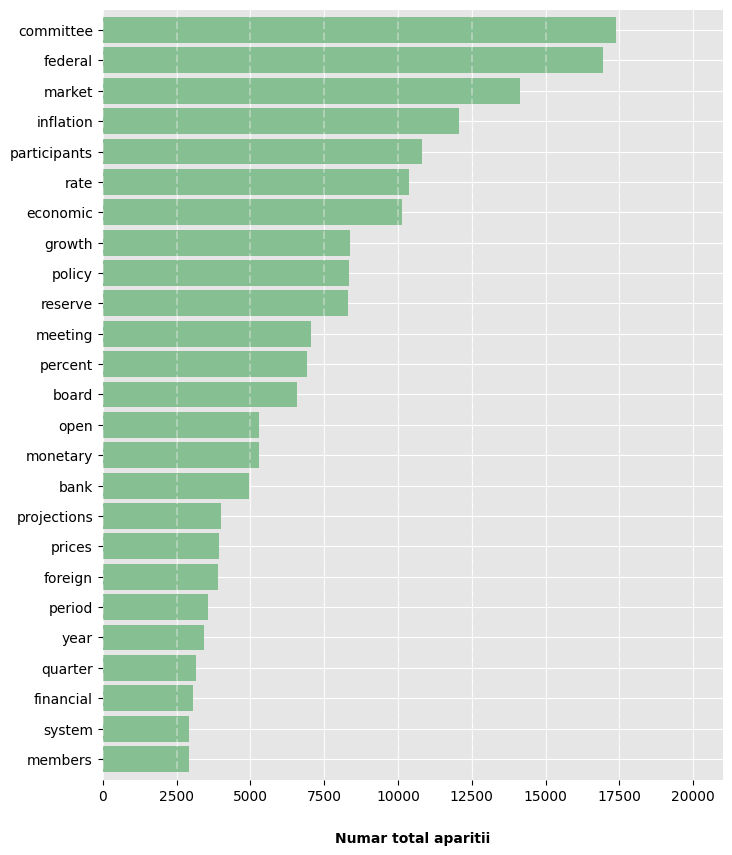

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# Assuming sorted_top_words is already defined and sorted
sorted_top_words = sorted_top_words.sort_values(by="Count")

plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
              axisbelow=True, grid=True)
plt.rc('grid', color='w', linestyle='solid')

ax = sorted_top_words.plot(kind='barh', figsize=(8, 10), color='#86bf91', width=0.85)

ax.get_legend().remove()
plt.title("", fontsize=12, weight='bold')
# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set axis labels
ax.yaxis.label.set_visible(False)
ax.set_xlabel("Numar total aparitii", labelpad=20, weight='bold', size=10)

plt.savefig('fomc_top_words.png', dpi=60, bbox_inches="tight")
files.download('fomc_top_words.png')


In [ ]:
import pandas as pd

# Path to the CSV file
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/LM-SA-2020.csv"

# Read the CSV file into a DataFrame
data = pd.read_csv(csv_file_path)

# Ensure the columns are in the correct format
data['word'] = data['word'].str.lower()
data['sentiment'] = data['sentiment'].str.capitalize()

# List of sentiment classes
sentiment_classes = ["Negative", "Positive", "Uncertainty", "Strongmodal", "Weakmodal", "Constraining"]

# Initialize an empty list to hold DataFrames for each sentiment class
word_list = []

# Loop through each sentiment class and extract the words
for sentiment_class in sentiment_classes:
    sentiment_list = data[data['sentiment'] == sentiment_class][['word']].dropna()
    sentiment_list.columns = [sentiment_class]
    word_list.append(sentiment_list)

# Concatenate the data frames and fill NA values with an empty string
word_list = pd.concat(word_list, axis=1, sort=True).fillna(" ")

# Print the head of the data frame
print(word_list.head())

# Create a dictionary from the data frame
word_dict = word_list.to_dict('list')

# Print the dictionary
print(word_dict)


       Negative Positive Uncertainty Strongmodal Weakmodal Constraining
0       abandon                                                        
1     abandoned                                                        
2    abandoning                                                        
3   abandonment                                                        
4  abandonments                                                        
{'Negative': ['abandon', 'abandoned', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abdicated', 'abdicates', 'abdicating', 'abdication', 'abdications', 'aberrant', 'aberration', 'aberrational', 'aberrations', 'abetting', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'abolish', 'abolished', 'abolishes', 'abolishing', 'abrogate', 'abrogated', 'abrogates', 'abrogating', 'abrogation', 'abrogations', 'abrupt', 'abruptly', 'abruptness', 'absence', 'absences', 'absenteeism', 'abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abusively', 'abusiv

In [ ]:
def negated(word):
    """
    Determine if preceding word is a negation word
    """
    if word.lower() in negate:
        return True
    else:
        return False

In [ ]:
pip install nltk

In [ ]:
import nltk
from nltk.corpus import opinion_lexicon
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [ ]:
import pandas as pd
import re
from nltk.corpus import opinion_lexicon

word_list = {
    'Positive': list(opinion_lexicon.positive()),
    'Negative': list(opinion_lexicon.negative())
}

negate = ["aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt", "ain't", "aren't", "can't",
          "couldn't", "daren't", "didn't", "doesn't", "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt",
          "neither", "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "neednt", "needn't",
          "never", "none", "nope", "nor", "not", "nothing", "nowhere", "oughtnt", "shant", "shouldnt", "wasnt",
          "werent", "oughtn't", "shan't", "shouldn't", "wasn't", "weren't", "without", "wont", "wouldnt", "won't",
          "wouldn't", "rarely", "seldom", "despite", "no", "nobody"]

def negated(word):
    """Determine if preceding word is a negation word"""
    return word.lower() in negate

def count_with_negation(fin_dict, transcript):
    """Count positive and negative words with negation check"""
    pos_count = 0
    neg_count = 0
    pos_words = []
    neg_words = []
    input_words = re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', transcript.lower())
    word_count = len(input_words)
    for i in range(0, word_count):
        if input_words[i] in fin_dict['Negative']:
            neg_count += 1
            neg_words.append(input_words[i])
        if input_words[i] in fin_dict['Positive']:
            if i >= 3:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]) or negated(input_words[i - 3]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 2:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 1:
                if negated(input_words[i - 1]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 0:
                pos_count += 1
                pos_words.append(input_words[i])
    results = [word_count, pos_count, neg_count, pos_words, neg_words]
    return results

temp = [count_with_negation(word_list, x) for x in data.Transcript]
temp = pd.DataFrame(temp)
data['wordcount'] = temp.iloc[:, 0].values
data['NPositiveWords'] = temp.iloc[:, 1].values
data['NNegativeWords'] = temp.iloc[:, 2].values
data['Poswords'] = temp.iloc[:, 3].values
data['Negwords'] = temp.iloc[:, 4].values

temp.head()


,0,1,2,3,4
0,812,6,11,"[permissible, modest, consistent, sustainable,...","[burns, vice, miss, vice, craven, vice, vice, ..."
1,4508,48,57,"[qualified, qualify, pleasure, satisfactory, s...","[burns, vice, miss, vice, vice, vice, vice, bu..."
2,895,16,15,"[respect, respect, maturity, maturity, faster,...","[burns, vice, miss, vice, craven, vice, vice, ..."
3,1021,9,10,"[faster, advanced, savings, well, outstanding,...","[burns, miss, miss, vice, craven, vice, vice, ..."
4,832,10,18,"[respect, rapid, rapid, quiet, rapid, savings,...","[burns, vice, vice, craven, vice, vice, vice, ..."


In [ ]:
# Display the last 10 rows of the Data DataFrame
data.tail(10)

,Transcript,all_words,top_tokens,wordcount,NPositiveWords,NNegativeWords,Poswords,Negwords
Date,,,,,,,,
2023-03-22,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('inflation', 84), ('board', 71), ('participa...",7711,164,147,"[effective, stability, stability, good, resili...","[vice, vice, vice, vice, burns, vice, vice, bu..."
2023-05-03,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('inflation', 78), ('board', 76), ('participa...",8507,187,206,"[stability, lead, stability, eased, smoothly, ...","[vice, vice, vice, bump, vice, vice, vice, vic..."
2023-06-14,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('inflation', 82), ('board', 69), ('participa...",7300,157,141,"[stability, stability, sensitive, maturity, he...","[vice, burns, vice, vice, vice, vice, vice, vi..."
2023-07-26,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('inflation', 69), ('board', 67), ('federal',...",7165,167,132,"[stability, stability, easing, robust, softer,...","[vice, vice, vice, vice, vice, vice, vice, vic..."
2023-09-20,_ ____________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('board', 66), ('participants', 61), ('inflat...",6827,155,137,"[stability, stability, sensitive, appreciated,...","[vice, vice, vice, vice, vice, vice, vice, vic..."
2023-11-01,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('board', 69), ('inflation', 61), ('participa...",7148,148,133,"[stability, stability, stability, well, strong...","[vice, vice, vice, vice, vice, vice, vice, vic..."
2023-12-13,_ ____________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('inflation', 71), ('board', 61), ('participa...",7096,173,139,"[stability, stability, eased, supported, notab...","[vice, vice, vice, burns, vice, vice, vice, de..."
2024-01-31,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('federal', 70), ('participants', 69), ('boar...",7790,192,158,"[stability, stability, pleasure, satisfactory,...","[vice, vice, vice, vice, vice, vice, vice, vic..."
2024-03-20,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('board', 74), ('rate', 62), ('participants',...",7562,195,145,"[stability, stability, eased, strong, gains, r...","[vice, vice, vice, vice, vice, slow, vice, vic..."


In [ ]:
Data = data

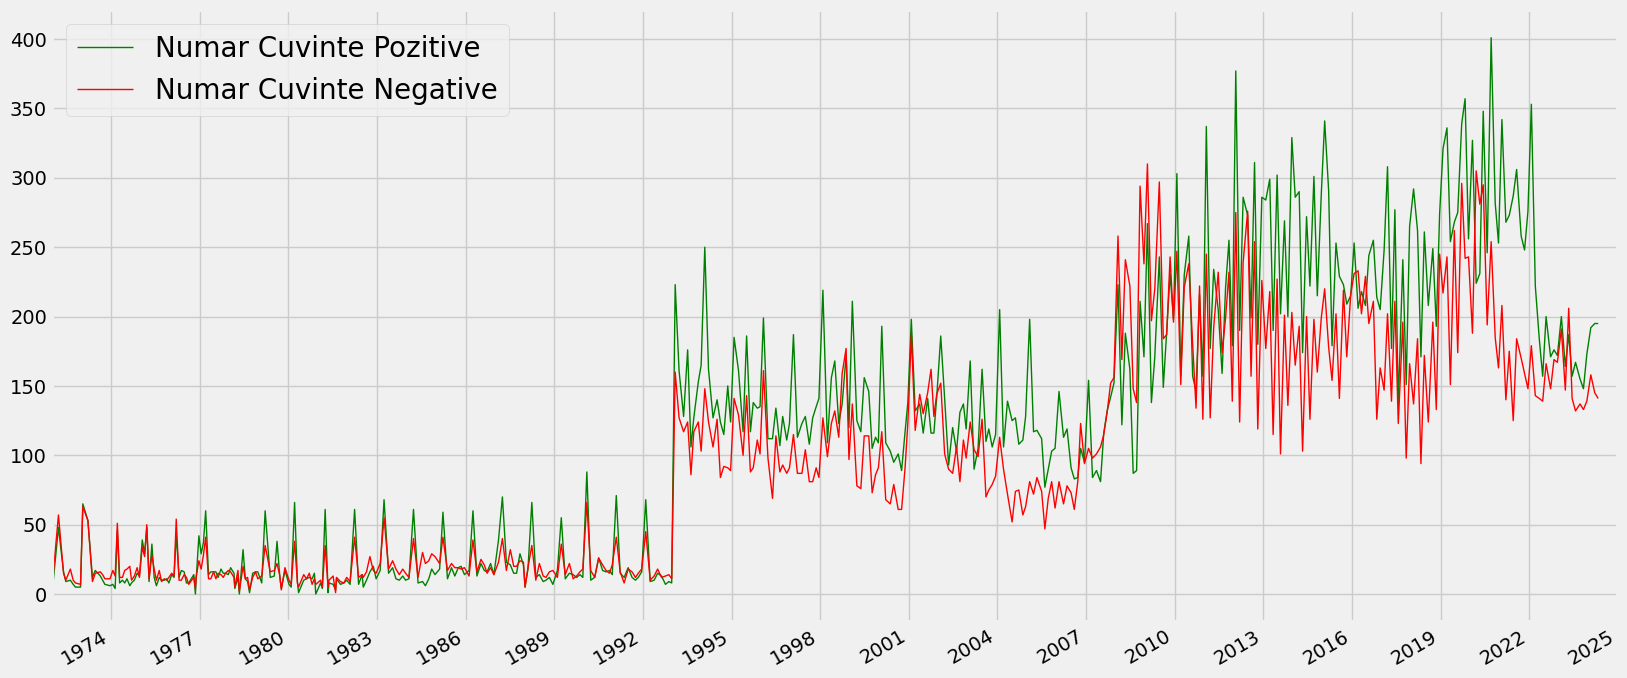

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

# Assuming the date information is in the index and not in a column
# If the index contains the dates, let's reset the index to access the date
Data.reset_index(inplace=True)

# Rename the first column to 'Date' if necessary
Data.rename(columns={'index': 'Date'}, inplace=True)

# Ensure that the 'Date' column is in datetime format
Data['Date'] = pd.to_datetime(Data['Date'], errors='coerce')

# Remove rows with invalid dates if any
Data = Data.dropna(subset=['Date'])

# Set the 'Date' column as the index
Data.set_index('Date', inplace=True)

# Plotting
plt.rcParams["figure.figsize"] = (18, 9)
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

ax.plot(Data.index, Data['NPositiveWords'], c='green', linewidth=1.0)
ax.plot(Data.index, Data['NNegativeWords'], c='red', linewidth=1.0)

plt.legend(['Numar Cuvinte Pozitive', 'Numar Cuvinte Negative'], prop={'size': 20}, loc=2)

# Format the ticks
years = mdates.YearLocator(3)   # every 3 years
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

datemin = np.datetime64(Data.index[0], 'Y')
datemax = np.datetime64(Data.index[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

plt.savefig('fomc_correlated_words.png', dpi=60, bbox_inches="tight")
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

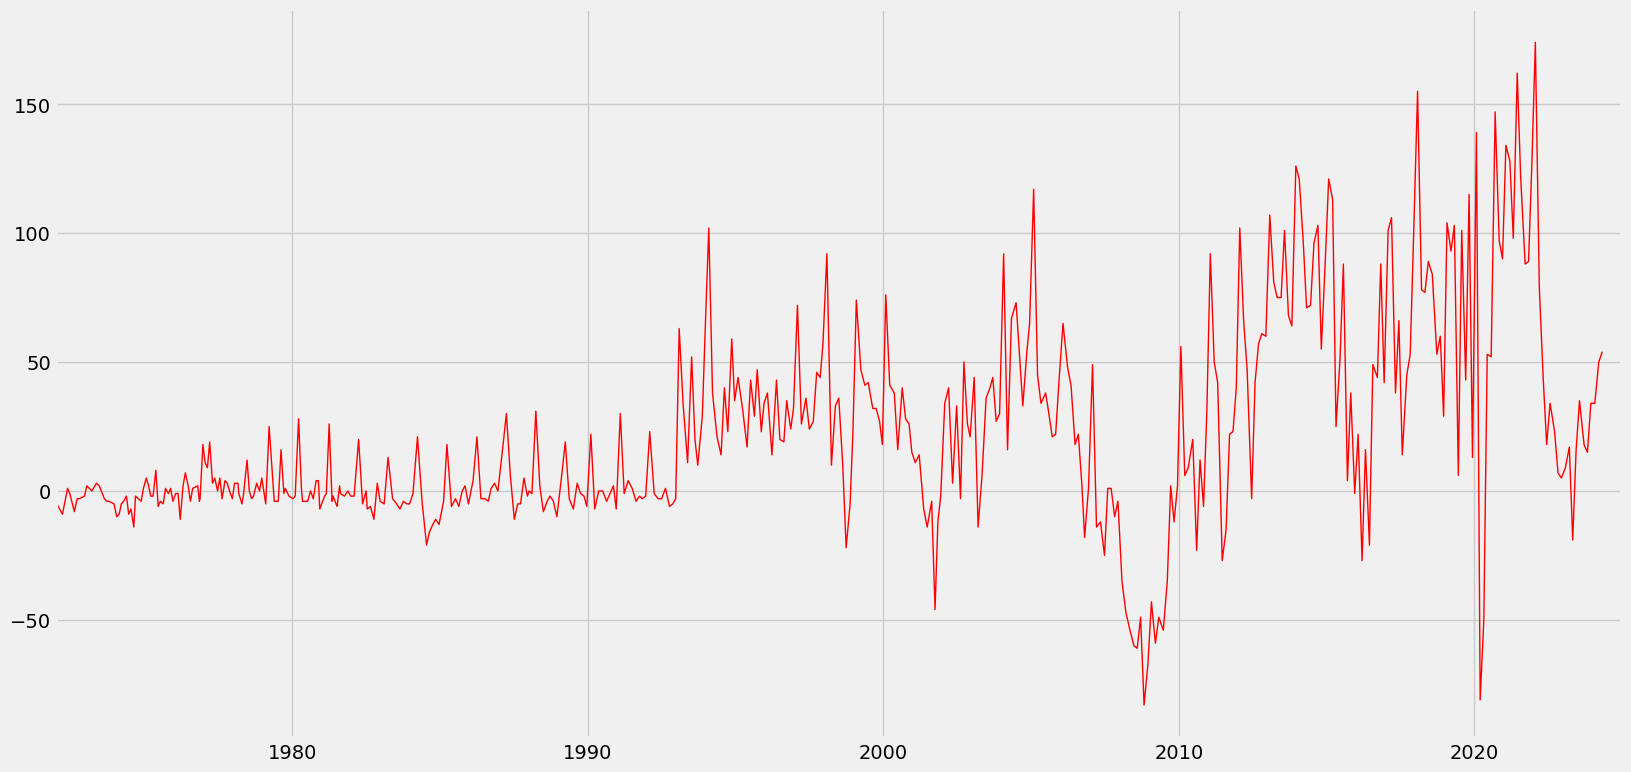

In [ ]:
NetSentiment = (Data['NPositiveWords'] - Data['NNegativeWords'])

fig, ax = plt.subplots()

ax.plot(Data.index, NetSentiment,
         c = 'red',
         linewidth= 1.0)

plt.title('',size = 'medium')

# format the ticks
# round to nearest years.
datemin = np.datetime64(Data.index[0], 'Y')
datemax = np.datetime64(Data.index[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

plt.savefig('fomc_net_sentiment.png',dpi=60, bbox_inches = "tight")
files.download('fomc_net_sentiment.png');

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

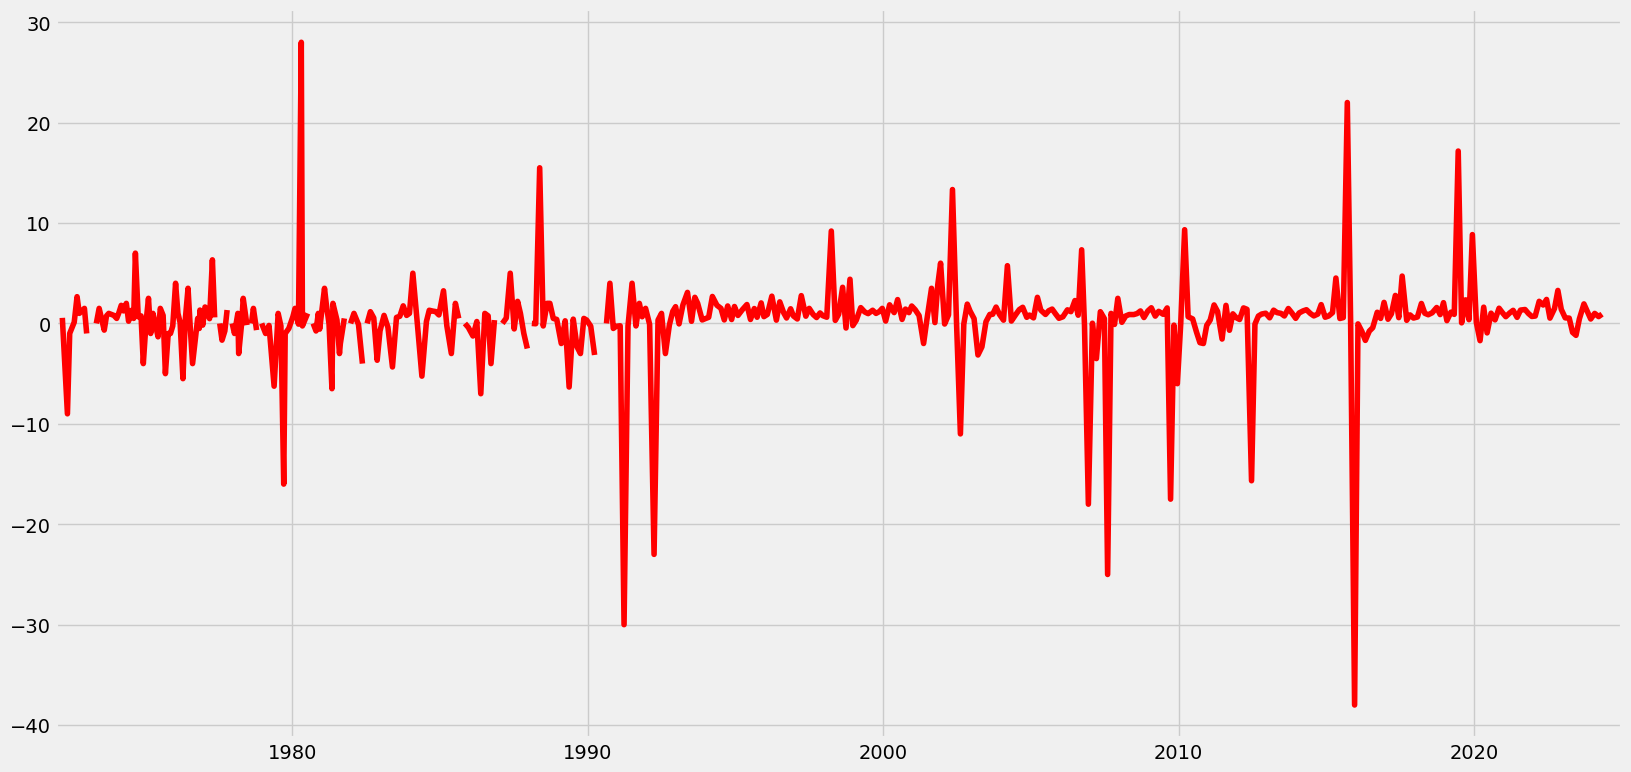

In [ ]:
firstderivative = (NetSentiment.shift(1) / NetSentiment)

fig, ax = plt.subplots()

ax.plot(Data.index, firstderivative,
         c = 'red')

plt.title('')

# format the ticks
# round to nearest years.
datemin = np.datetime64(Data.index[0], 'Y')
datemax = np.datetime64(Data.index[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

plt.savefig('fomc_sentiment_chg.png',dpi=60, bbox_inches = "tight")
files.download('fomc_sentiment_chg.png');

plt.show()

In [ ]:
#Retrive historical price data for the SP500
from datetime import datetime, timedelta
ticker = '^GSPC'

window = 250
start = Data.index[0] - timedelta(days=window)
end = Data.index[-1]
market = yf.download(ticker, start=start, end=end, auto_adjust=False)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#Convert to the daily changes and smooth out data with a 250day trailing ma
market_norm = market['Volume']
# market_norm = market_norm.diff()
market_norm = market_norm.rolling(window=250).mean() #250day trailing average window
market_norm.dropna(inplace=True)

In [ ]:
#Need to fix the x axis to give both series the same length
resampled = market_norm.reindex(NetSentiment.index, method='ffill')

import warnings
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.concat([NetSentiment,resampled], axis=1)
df.rename(columns={0: 'Sentiment','Volume':'S&P500'}, inplace=True)
df['S&P500'] = df['S&P500'].diff()
df = df.dropna(axis = 0, how ='any')
# df['S&P500']=df['S&P500'].fillna(0)
n_mos = df['S&P500'].shape[0]

try:
  return_per_period = (df['S&P500']+1).prod()**(1/n_mos) - 1
except:
  return_per_period = 0

df.head()

,Sentiment,S&P500
Date,,
1972-06-20,-1,91120.000
1972-08-15,-8,201880.000
1972-09-19,-3,38920.000
1972-10-17,-3,16000.000
1972-12-19,-2,627680.000


In [ ]:
print(df.columns)
print(df.head())

Index(['Sentiment', 'S&P500'], dtype='object')
            Sentiment     S&P500
Date                            
1972-06-20         -1  91120.000
1972-08-15         -8 201880.000
1972-09-19         -3  38920.000
1972-10-17         -3  16000.000
1972-12-19         -2 627680.000


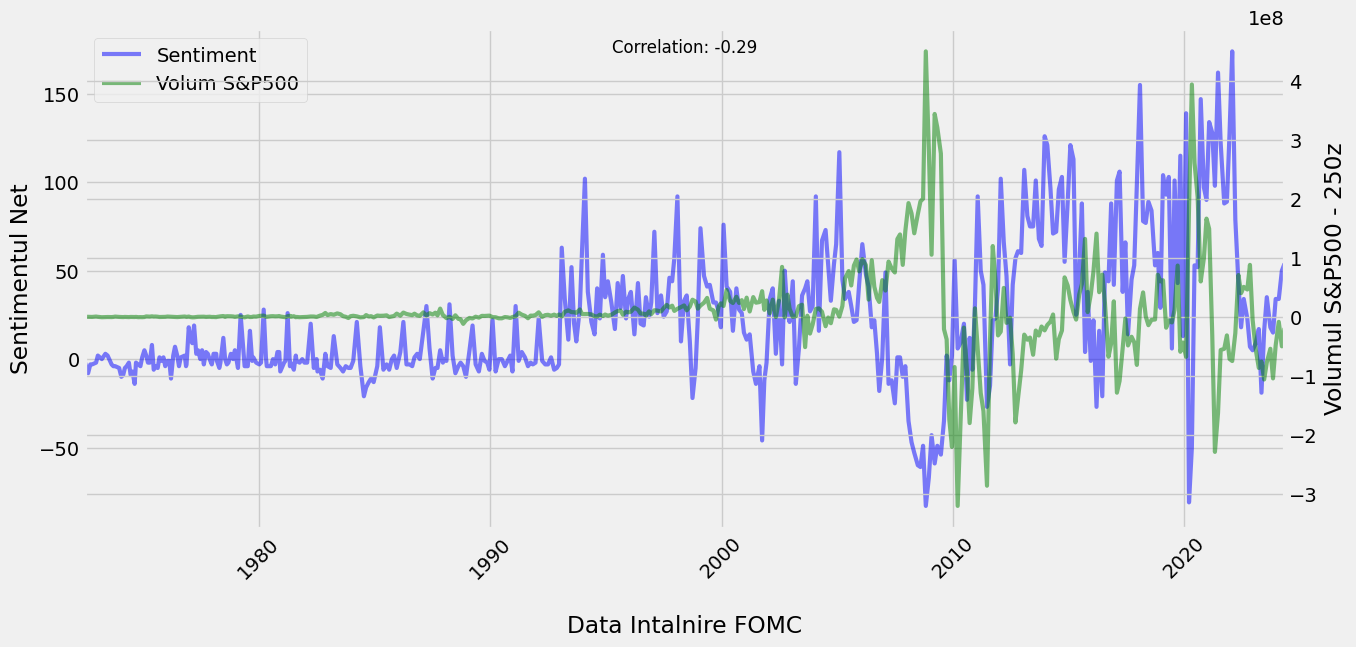

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Reset the index to use it as a column for plotting
df_reset = df.reset_index()

fig = plt.figure(figsize=(12, 5))
line_weight = 3
alpha = .5

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = ax1.twinx()

lns1 = ax1.plot(df_reset['Date'], df_reset['Sentiment'], color='blue', lw=line_weight, alpha=alpha, label='Sentiment')
lns2 = ax2.plot(df_reset['Date'], df_reset['S&P500'], color='green', lw=line_weight, alpha=alpha, label='Volum S&P500')

market_corr = df['S&P500'].corr(df['Sentiment'])

leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='best')

plt.title('', fontweight='bold', fontsize=18)
plt.suptitle('Correlation: {}'.format(round(market_corr, 3)), fontsize=12)

ax1.set(ylabel="Sentimentul Net")
ax2.set(ylabel="Volumul S&P500 - 250z")
ax1.set(xlabel="\nData Intalnire FOMC")

# Use AutoDateLocator and DateFormatter for x-axis
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate date labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Set the limits for the x-axis
ax1.set_xlim(df_reset['Date'].min(), df_reset['Date'].max())

plt.savefig('sentiment_corr.png', dpi=60, bbox_inches="tight")
plt.show()


In [ ]:
#Retrive historical price data for the SP500
from datetime import datetime, timedelta
ticker = '^GSPC'

window = 250
start = Data.index[0] - timedelta(days=window)
end = Data.index[-1]
market = yf.download(ticker, start=start, end=end, auto_adjust=False)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#Convert to the daily changes and smooth out data with a 250day trailing ma
market_norm = market['Adj Close']
# market_norm = market_norm.diff()
market_norm = market_norm.rolling(window=250).mean() #250day trailing average window
market_norm.dropna(inplace=True)

In [ ]:
#Need to fix the x axis to give both series the same length
resampled = market_norm.reindex(NetSentiment.index, method='ffill')

import warnings
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.concat([NetSentiment,resampled], axis=1)
df.rename(columns={0: 'Sentiment','Adj Close':'S&P500'}, inplace=True)
df['S&P500'] = df['S&P500'].diff()
df = df.dropna(axis = 0, how ='any')
# df['S&P500']=df['S&P500'].fillna(0)
n_mos = df['S&P500'].shape[0]

try:
  return_per_period = (df['S&P500']+1).prod()**(1/n_mos) - 1
except:
  return_per_period = 0

df.head()

,Sentiment,S&P500
Date,,
1972-06-20,-1,0.674
1972-08-15,-8,1.640
1972-09-19,-3,1.023
1972-10-17,-3,0.874
1972-12-19,-2,3.374


In [ ]:
print(df.columns)
print(df.head())

Index(['Sentiment', 'S&P500'], dtype='object')
            Sentiment  S&P500
Date                         
1972-06-20         -1   0.674
1972-08-15         -8   1.640
1972-09-19         -3   1.023
1972-10-17         -3   0.874
1972-12-19         -2   3.374


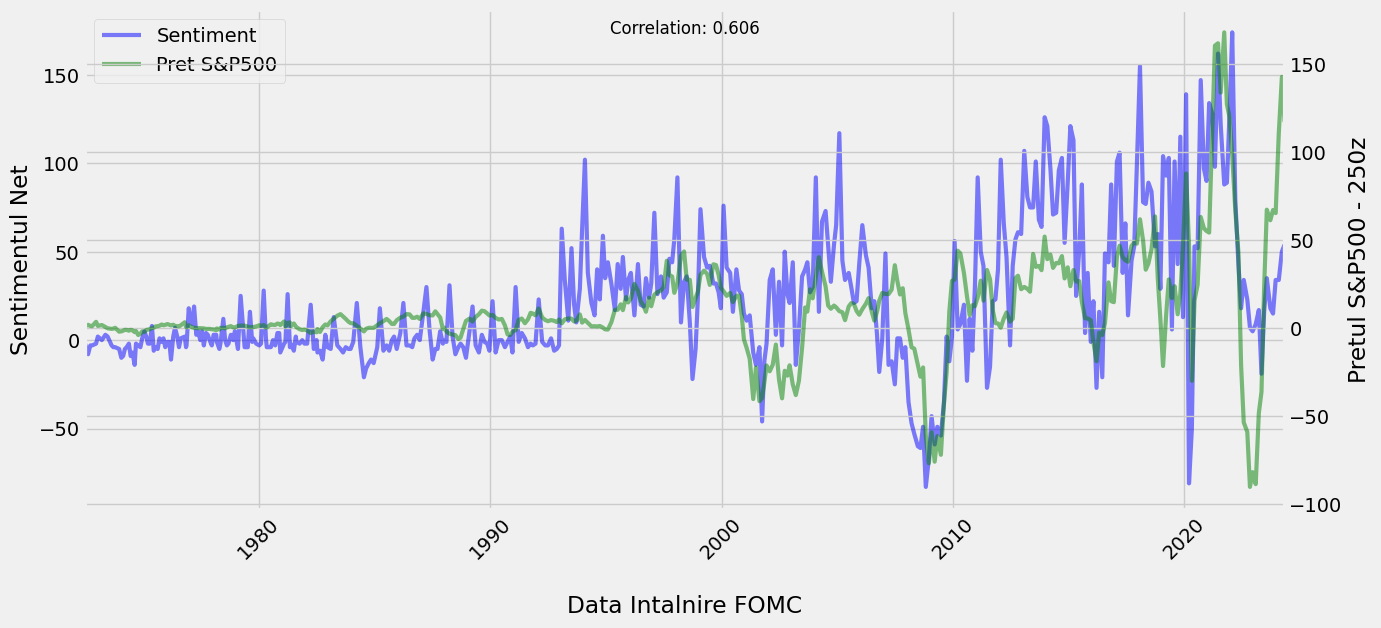

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Reset the index to use it as a column for plotting
df_reset = df.reset_index()

fig = plt.figure(figsize=(12, 5))
line_weight = 3
alpha = .5

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = ax1.twinx()

lns1 = ax1.plot(df_reset['Date'], df_reset['Sentiment'], color='blue', lw=line_weight, alpha=alpha, label='Sentiment')
lns2 = ax2.plot(df_reset['Date'], df_reset['S&P500'], color='green', lw=line_weight, alpha=alpha, label='Pret S&P500')

market_corr = df['S&P500'].corr(df['Sentiment'])

leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='best')

plt.title('', fontweight='bold', fontsize=18)
plt.suptitle('Correlation: {}'.format(round(market_corr, 3)), fontsize=12)

ax1.set(ylabel="Sentimentul Net")
ax2.set(ylabel="Pretul S&P500 - 250z")
ax1.set(xlabel="\nData Intalnire FOMC")

# Use AutoDateLocator and DateFormatter for x-axis
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate date labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Set the limits for the x-axis
ax1.set_xlim(df_reset['Date'].min(), df_reset['Date'].max())

plt.savefig('sentiment_corr.png', dpi=60, bbox_inches="tight")
plt.show()


In [ ]:
#Dickey Fuller test - helper function to check for stationarity in our time series

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Testul Augmented Dickey-Fuller: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['Testul ADF statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())   # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:

        print("Se respinge ipoteza nula")
        print("Seria de timp nu are o radacina unica si este stationara")
    else:

        print("Se accepta ipoteza alternativa")
        print("Seria de timp are o radacina unica si este nestationara")

adf_test(df['Sentiment'], title='Sentiment')

adf_test(df['S&P500'], title='S&P500')

Testul Augmented Dickey-Fuller: Sentiment
Testul ADF statistic    -2.873
p-value                  0.049
# lags used             17.000
# observations         426.000
critical value (1%)     -3.446
critical value (5%)     -2.868
critical value (10%)    -2.570
Se respinge ipoteza nula
Seria de timp nu are o radacina unica si este stationara
Testul Augmented Dickey-Fuller: S&P500
Testul ADF statistic    -2.610
p-value                  0.091
# lags used             16.000
# observations         427.000
critical value (1%)     -3.446
critical value (5%)     -2.868
critical value (10%)    -2.570
Se accepta ipoteza alternativa
Seria de timp are o radacina unica si este nestationara


In [ ]:
# Differencing the Sentiment series to make it stationary
df['S&P500_diff'] = df['S&P500'].diff().dropna()

# Re-check stationarity after differencing
adf_test(df['S&P500_diff'].dropna(), title='Differenced S&P500')

Testul Augmented Dickey-Fuller: Differenced S&P500
Testul ADF statistic    -9.366
p-value                  0.000
# lags used             15.000
# observations         427.000
critical value (1%)     -3.446
critical value (5%)     -2.868
critical value (10%)    -2.570
Se respinge ipoteza nula
Seria de timp nu are o radacina unica si este stationara


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
data = df[['S&P500','Sentiment']]


print("***Sentiment signal***")
grangercausalitytests(data,maxlag=3);
print('_______________________________________')

***Sentiment signal***

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.3903  , p=0.0040  , df_denom=440, df_num=1
ssr based chi2 test:   chi2=8.4475  , p=0.0037  , df=1
likelihood ratio test: chi2=8.3680  , p=0.0038  , df=1
parameter F test:         F=8.3903  , p=0.0040  , df_denom=440, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.6188  , p=0.0104  , df_denom=437, df_num=2
ssr based chi2 test:   chi2=9.3433  , p=0.0094  , df=2
likelihood ratio test: chi2=9.2459  , p=0.0098  , df=2
parameter F test:         F=4.6188  , p=0.0104  , df_denom=437, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.7577  , p=0.0110  , df_denom=434, df_num=3
ssr based chi2 test:   chi2=11.4550 , p=0.0095  , df=3
likelihood ratio test: chi2=11.3087 , p=0.0102  , df=3
parameter F test:         F=3.7577  , p=0.0110  , df_denom=434, df_num=3
_______________________________________


In [ ]:
#NASDAQ

In [ ]:
#Retrive historical price data for the SP500
from datetime import datetime, timedelta
ticker = '^IXIC'

window = 250
start = Data.index[0] - timedelta(days=window)
end = Data.index[-1]
market = yf.download(ticker, start=start, end=end, auto_adjust=False)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#Convert to the daily changes and smooth out data with a 250day trailing ma
market_norm = market['Volume']
# market_norm = market_norm.diff()
market_norm = market_norm.rolling(window=250).mean() #250day trailing average window
market_norm.dropna(inplace=True)

In [ ]:
#Need to fix the x axis to give both series the same length
resampled = market_norm.reindex(NetSentiment.index, method='ffill')

import warnings
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.concat([NetSentiment,resampled], axis=1)
df.rename(columns={0: 'Sentiment','Volume':'^IXIC'}, inplace=True)
df['^IXIC'] = df['^IXIC'].diff()
df = df.dropna(axis = 0, how ='any')
# df['^IXIC']=df['^IXIC'].fillna(0)
n_mos = df['^IXIC'].shape[0]

try:
  return_per_period = (df['^IXIC']+1).prod()**(1/n_mos) - 1
except:
  return_per_period = 0

df.head()

,Sentiment,^IXIC
Date,,
1972-06-20,-1,0.000
1972-08-15,-8,0.000
1972-09-19,-3,0.000
1972-10-17,-3,0.000
1972-12-19,-2,0.000


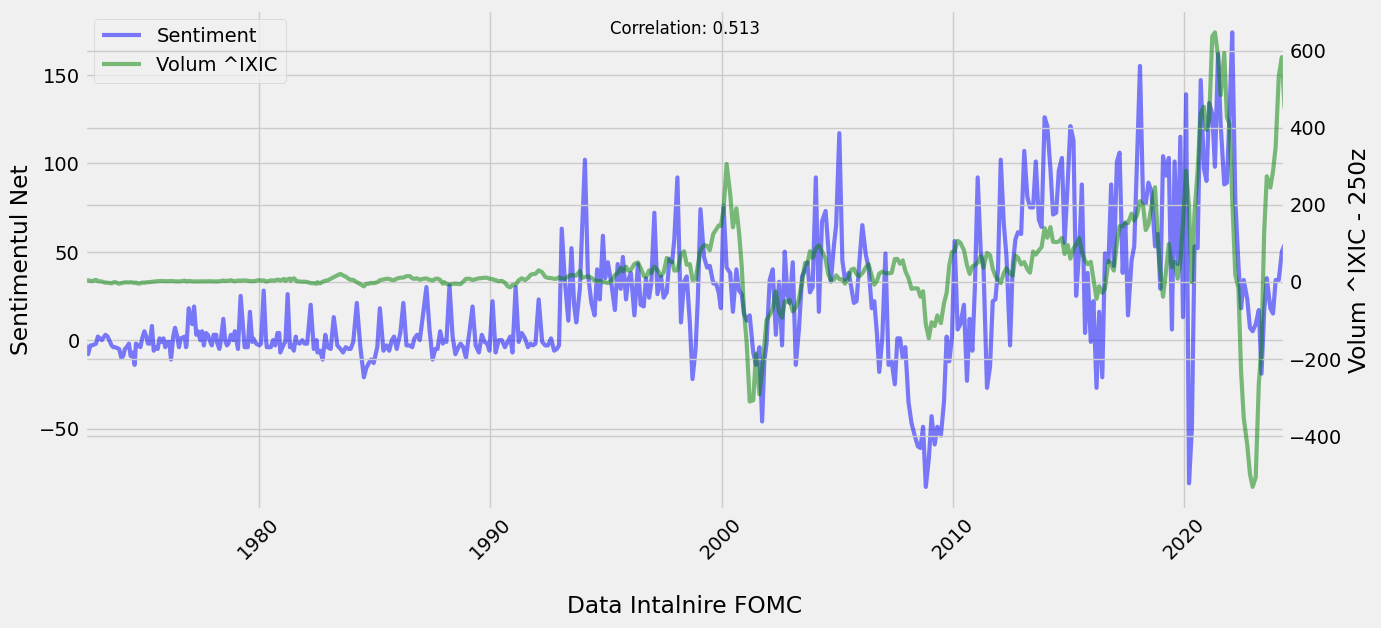

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Reset the index to use it as a column for plotting
df_reset = df.reset_index()

fig = plt.figure(figsize=(12, 5))
line_weight = 3
alpha = .5

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = ax1.twinx()

lns1 = ax1.plot(df_reset['Date'], df_reset['Sentiment'], color='blue', lw=line_weight, alpha=alpha, label='Sentiment')
lns2 = ax2.plot(df_reset['Date'], df_reset['^IXIC'], color='green', lw=line_weight, alpha=alpha, label='Volum ^IXIC')

market_corr = df['^IXIC'].corr(df['Sentiment'])

leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='best')

plt.title('', fontweight='bold', fontsize=18)
plt.suptitle('Correlation: {}'.format(round(market_corr, 3)), fontsize=12)

ax1.set(ylabel="Sentimentul Net")
ax2.set(ylabel="Volum ^IXIC - 250z")
ax1.set(xlabel="\nData Intalnire FOMC")

# Use AutoDateLocator and DateFormatter for x-axis
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate date labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Set the limits for the x-axis
ax1.set_xlim(df_reset['Date'].min(), df_reset['Date'].max())

plt.savefig('sentiment_corr.png', dpi=60, bbox_inches="tight")
plt.show()


In [ ]:
#Retrive historical price data for the SP500
from datetime import datetime, timedelta
ticker = '^IXIC'

window = 250
start = Data.index[0] - timedelta(days=window)
end = Data.index[-1]
market = yf.download(ticker, start=start, end=end, auto_adjust=False)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#Convert to the daily changes and smooth out data with a 250day trailing ma
market_norm = market['Adj Close']
# market_norm = market_norm.diff()
market_norm = market_norm.rolling(window=250).mean() #250day trailing average window
market_norm.dropna(inplace=True)

In [ ]:
#Need to fix the x axis to give both series the same length
resampled = market_norm.reindex(NetSentiment.index, method='ffill')

import warnings
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.concat([NetSentiment,resampled], axis=1)
df.rename(columns={0: 'Sentiment','Adj Close':'^IXIC'}, inplace=True)
df['^IXIC'] = df['^IXIC'].diff()
df = df.dropna(axis = 0, how ='any')
# df['^IXIC']=df['^IXIC'].fillna(0)
n_mos = df['^IXIC'].shape[0]

try:
  return_per_period = (df['^IXIC']+1).prod()**(1/n_mos) - 1
except:
  return_per_period = 0

df.head()

,Sentiment,^IXIC
Date,,
1972-06-20,-1,1.765
1972-08-15,-8,3.449
1972-09-19,-3,1.930
1972-10-17,-3,1.505
1972-12-19,-2,4.515


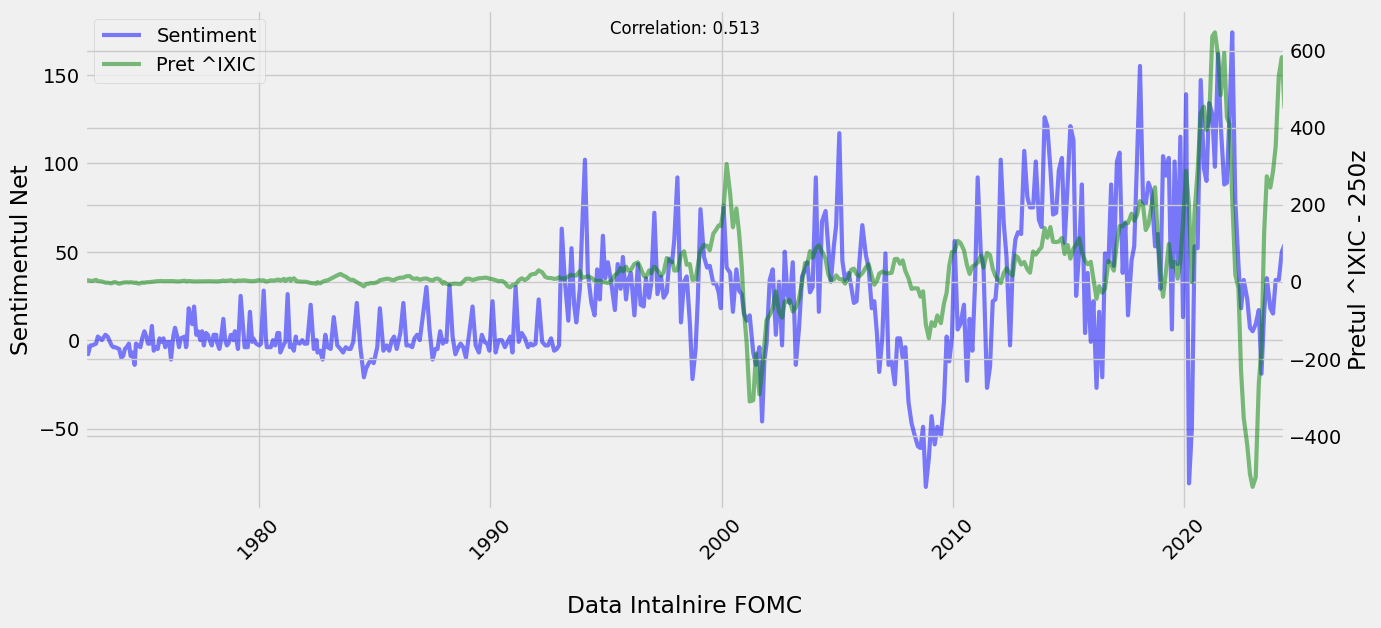

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Reset the index to use it as a column for plotting
df_reset = df.reset_index()

fig = plt.figure(figsize=(12, 5))
line_weight = 3
alpha = .5

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = ax1.twinx()

lns1 = ax1.plot(df_reset['Date'], df_reset['Sentiment'], color='blue', lw=line_weight, alpha=alpha, label='Sentiment')
lns2 = ax2.plot(df_reset['Date'], df_reset['^IXIC'], color='green', lw=line_weight, alpha=alpha, label='Pret ^IXIC')

market_corr = df['^IXIC'].corr(df['Sentiment'])

leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='best')

plt.title('', fontweight='bold', fontsize=18)
plt.suptitle('Correlation: {}'.format(round(market_corr, 3)), fontsize=12)

ax1.set(ylabel="Sentimentul Net")
ax2.set(ylabel="Pretul ^IXIC - 250z")
ax1.set(xlabel="\nData Intalnire FOMC")

# Use AutoDateLocator and DateFormatter for x-axis
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate date labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Set the limits for the x-axis
ax1.set_xlim(df_reset['Date'].min(), df_reset['Date'].max())

plt.savefig('sentiment_corr.png', dpi=60, bbox_inches="tight")
plt.show()


In [ ]:
#Dickey Fuller test - helper function to check for stationarity in our time series

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Testul Augmented Dickey-Fuller: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['Testul ADF statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())   # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:

        print("Se respinge ipoteza nula")
        print("Seria de timp nu are o radacina unica si este stationara")
    else:

        print("Se accepta ipoteza alternativa")
        print("Seria de timp are o radacina unica si este nestationara")

adf_test(df['Sentiment'], title='Sentiment')

adf_test(df['^IXIC'], title='^IXIC')

Testul Augmented Dickey-Fuller: Sentiment
Testul ADF statistic    -2.873
p-value                  0.049
# lags used             17.000
# observations         426.000
critical value (1%)     -3.446
critical value (5%)     -2.868
critical value (10%)    -2.570
Se respinge ipoteza nula
Seria de timp nu are o radacina unica si este stationara
Testul Augmented Dickey-Fuller: ^IXIC
Testul ADF statistic    -3.019
p-value                  0.033
# lags used             16.000
# observations         427.000
critical value (1%)     -3.446
critical value (5%)     -2.868
critical value (10%)    -2.570
Se respinge ipoteza nula
Seria de timp nu are o radacina unica si este stationara


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
data = df[['^IXIC','Sentiment']]


print("***Sentiment signal***")
grangercausalitytests(data,maxlag=3);
print('_______________________________________')

***Sentiment signal***

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0905  , p=0.7637  , df_denom=440, df_num=1
ssr based chi2 test:   chi2=0.0911  , p=0.7628  , df=1
likelihood ratio test: chi2=0.0911  , p=0.7628  , df=1
parameter F test:         F=0.0905  , p=0.7637  , df_denom=440, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4482  , p=0.2361  , df_denom=437, df_num=2
ssr based chi2 test:   chi2=2.9295  , p=0.2311  , df=2
likelihood ratio test: chi2=2.9198  , p=0.2323  , df=2
parameter F test:         F=1.4482  , p=0.2361  , df_denom=437, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2729  , p=0.2832  , df_denom=434, df_num=3
ssr based chi2 test:   chi2=3.8802  , p=0.2747  , df=3
likelihood ratio test: chi2=3.8632  , p=0.2766  , df=3
parameter F test:         F=1.2729  , p=0.2832  , df_denom=434, df_num=3
_______________________________________


In [ ]:
#2 YEAR TREASURY YEILDS

In [ ]:
pip install pandas_datareader

In [ ]:
import pandas_datareader.data as web
from datetime import datetime, timedelta

# Define the start and end dates
start = Data.index[0] - timedelta(days=250)
end = Data.index[-1]

# Retrieve the 2-year Treasury yield data from FRED
ticker_2yr_treasury = 'DGS2'
market = web.DataReader(ticker_2yr_treasury, 'fred', start, end)

# Rename the DGS2 column to Yield
market.rename(columns={'DGS2': 'Yield'}, inplace=True)

# Display the column names
print("Column names for the 2-year Treasury yield data:")
print(market.columns)

# Display the first few rows of the data to verify
print("First few rows of the 2-year Treasury yield data:")
print(market.head())


Column names for the 2-year Treasury yield data:
Index(['Yield'], dtype='object')
First few rows of the 2-year Treasury yield data:
            Yield
DATE             
1976-06-01   7.26
1976-06-02   7.23
1976-06-03   7.22
1976-06-04   7.12
1976-06-07   7.09


In [ ]:
# Display the column names
print("Column names for the 2-year Treasury yield data:")
print(market.columns)

Column names for the 2-year Treasury yield data:
Index(['Yield'], dtype='object')


In [ ]:
#Convert to the daily changes and smooth out data with a 250day trailing ma
market_norm = market['Yield']
# market_norm = market_norm.diff()
market_norm = market_norm.rolling(window=250).mean() #250day trailing average window
market_norm.dropna(inplace=True)

In [ ]:
#Need to fix the x axis to give both series the same length
resampled = market_norm.reindex(NetSentiment.index, method='ffill')

import warnings
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.concat([NetSentiment,resampled], axis=1)
df.rename(columns={0: 'Sentiment','Yield':'DGS2'}, inplace=True)
df['DGS2'] = df['DGS2'].diff()
df = df.dropna(axis = 0, how ='any')

n_mos = df['DGS2'].shape[0]

try:
  return_per_period = (df['DGS2']+1).prod()**(1/n_mos) - 1
except:
  return_per_period = 0

df.head()

,Sentiment,DGS2
Date,,


Market data head:
            Yield
DATE             
1976-06-01  7.260
1976-06-02  7.230
1976-06-03  7.220
1976-06-04  7.120
1976-06-07  7.090
Market data index range: 1976-06-01 00:00:00 - 2024-05-01 00:00:00
Market data after rolling mean and dropping NaNs:
Empty DataFrame
Columns: [Yield]
Index: []
Market data index range after rolling mean: NaT - NaT
NetSentiment index range: 1972-01-11 00:00:00 - 2024-05-01 00:00:00
market index range: NaT - NaT
Resampled data head:
            Yield
Date             
1972-01-11    NaN
1972-03-21    NaN
1972-05-23    NaN
1972-06-20    NaN
1972-08-15    NaN
DataFrame is empty after concatenation and differencing. Exiting.
DataFrame head after concatenation and differencing:
Empty DataFrame
Columns: [Sentiment, DGS2]
Index: []
Return per period: 0


ValueError: Axis limits cannot be NaN or Inf

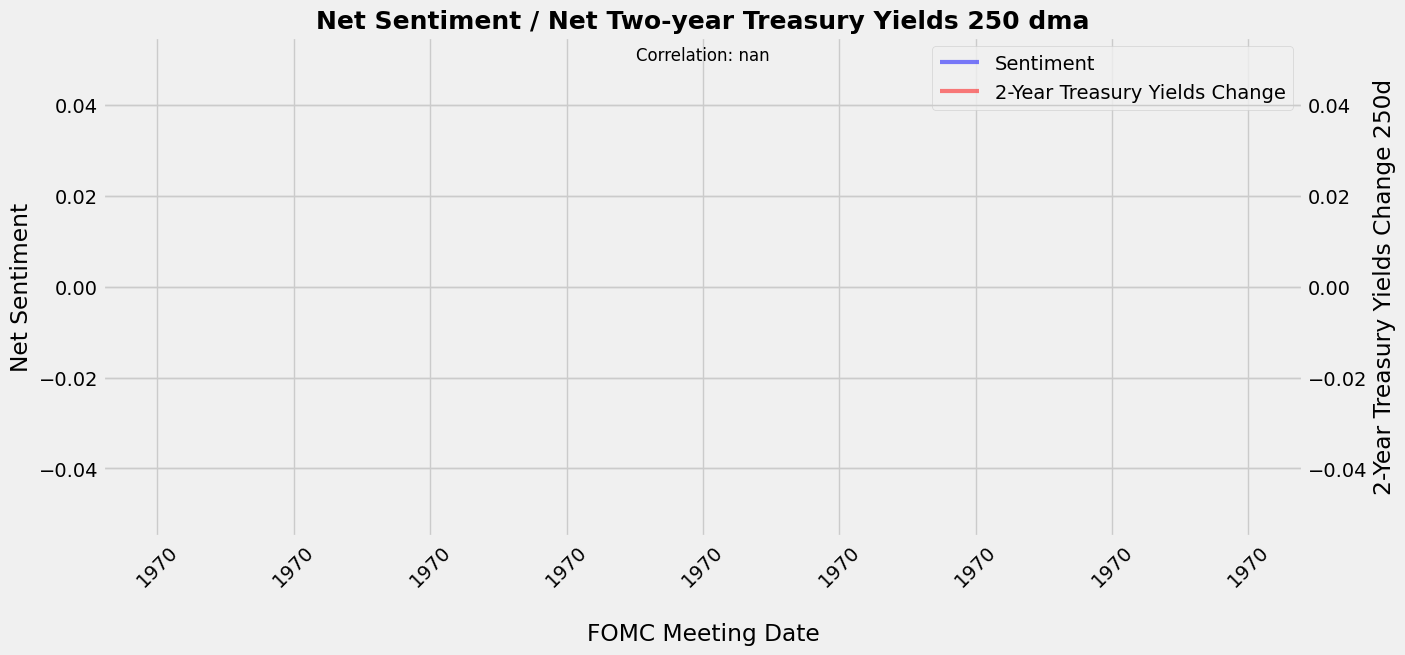

In [ ]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Define the ticker for the 2-year Treasury yield
ticker_2yr_treasury = 'DGS2'

# Set the window and dates
window = 250
start = NetSentiment.index[0] - timedelta(days=window)
end = NetSentiment.index[-1]

# Retrieve the 2-year Treasury yield data from FRED
market = web.DataReader(ticker_2yr_treasury, 'fred', start, end)

# Rename the DGS2 column to Yield
market.rename(columns={'DGS2': 'Yield'}, inplace=True)

# Check for valid dates in the market DataFrame
print("Market data head:")
print(market.head())
print("Market data index range:", market.index.min(), "-", market.index.max())

# Ensure there are enough data points for rolling average
if len(market) >= 250:
    market['Yield'] = market['Yield'].rolling(window=250).mean()
    market.dropna(inplace=True)
else:
    print("Not enough data points for rolling mean calculation.")
    exit()

# Check for valid dates in market after rolling mean
print("Market data after rolling mean and dropping NaNs:")
print(market.head())
print("Market data index range after rolling mean:", market.index.min(), "-", market.index.max())

# Check if NetSentiment is aligned with market
print("NetSentiment index range:", NetSentiment.index.min(), "-", NetSentiment.index.max())
print("market index range:", market.index.min(), "-", market.index.max())

# Reindex market to NetSentiment index
resampled = market.reindex(NetSentiment.index, method='ffill')

# Ensure resampled is not empty and check the alignment
print("Resampled data head:")
print(resampled.head())

# Concatenate the DataFrames
df = pd.concat([NetSentiment, resampled], axis=1)
df.rename(columns={0: 'Sentiment', 'Yield': 'DGS2'}, inplace=True)
df['DGS2'] = df['DGS2'].diff()
df = df.dropna(axis=0, how='any')

# Ensure the DataFrame is not empty
if df.empty:
    print("DataFrame is empty after concatenation and differencing. Exiting.")
    exit()

# Check the head of the DataFrame
print("DataFrame head after concatenation and differencing:")
print(df.head())

# Calculate return per period
n_mos = df['DGS2'].shape[0]
try:
    return_per_period = (df['DGS2'] + 1).prod()**(1 / n_mos) - 1
except:
    return_per_period = 0

print("Return per period:", return_per_period)

# Plotting the data
df_reset = df.reset_index()
fig = plt.figure(figsize=(12, 5))
line_weight = 3
alpha = .5

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = ax1.twinx()

lns1 = ax1.plot(df_reset['Date'], df_reset['Sentiment'], color='blue', lw=line_weight, alpha=alpha, label='Sentiment')
lns2 = ax2.plot(df_reset['Date'], df_reset['DGS2'], color='red', lw=line_weight, alpha=alpha, label='2-Year Treasury Yields Change')

market_corr = df['DGS2'].corr(df['Sentiment'])

leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='best')

plt.title('Net Sentiment / Net Two-year Treasury Yields 250 dma', fontweight='bold', fontsize=18)
plt.suptitle('Correlation: {}'.format(round(market_corr, 3)), fontsize=12)

ax1.set(ylabel="Net Sentiment")
ax2.set(ylabel="2-Year Treasury Yields Change 250d")
ax1.set(xlabel="\nFOMC Meeting Date")

# Use AutoDateLocator and DateFormatter for x-axis
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate date labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Set the limits for the x-axis
ax1.set_xlim(df_reset['Date'].min(), df_reset['Date'].max())

plt.savefig('sentiment_corr.png', dpi=60, bbox_inches="tight")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Reset the index to use it as a column for plotting
df_reset = df.reset_index()

fig = plt.figure(figsize=(12, 5))
line_weight = 3
alpha = .5

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = ax1.twinx()

lns1 = ax1.plot(df_reset['Date'], df_reset['Sentiment'], color='blue', lw=line_weight, alpha=alpha, label='Sentiment')
lns2 = ax2.plot(df_reset['Date'], df_reset['DGS2'], color='red', lw=line_weight, alpha=alpha, label='Two-year Treasury Yields Change')

market_corr = df['DGS2'].corr(df['Sentiment'])

leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='best')

plt.title('Net Sentiment / Net Two-year Treasury Yields 250 dma', fontweight='bold', fontsize=18)
plt.suptitle('Correlation: {}'.format(round(market_corr, 3)), fontsize=12)

ax1.set(ylabel="Net Sentiment")
ax2.set(ylabel="Two-year Treasury Yields Change 250d")
ax1.set(xlabel="\nFOMC Meeting Date")

# Use AutoDateLocator and DateFormatter for x-axis
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate date labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Set the limits for the x-axis
ax1.set_xlim(df_reset['Date'].min(), df_reset['Date'].max())

plt.savefig('sentiment_corr.png', dpi=60, bbox_inches="tight")
plt.show()


NameError: name 'df' is not defined

In [ ]:
import pandas as pd

# Assume NetSentiment and market are defined and have DateTime index
# Resample the market data to align with NetSentiment dates
resampled = market.reindex(NetSentiment.index, method='ffill')

# Combine NetSentiment and resampled market data
df = pd.concat([NetSentiment, resampled], axis=1)

# Rename columns accordingly
df.rename(columns={0: 'Sentiment', 'Yield': 'DGS2'}, inplace=True)

# Display the first and last few rows before differencing
print("First few rows before differencing:")
print(df.head())
print("Last few rows before differencing:")
print(df.tail())

# Compute the difference for DGS2 (2-year Treasury Yield)
df['DGS2'] = df['DGS2'].diff()

# Drop NaN values that may arise from differencing
df = df.dropna()

# Display the first and last few rows after differencing
print("First few rows after differencing:")
print(df.head())
print("Last few rows after differencing:")
print(df.tail())

# Calculate the number of months
n_mos = df['DGS2'].shape[0]

# Calculate return per period
try:
    return_per_period = (df['DGS2'] + 1).prod()**(1 / n_mos) - 1
except:
    return_per_period = 0

# Display the return per period
print("Return per period:", return_per_period)


First few rows before differencing:
            Sentiment  DGS2
Date                       
1972-01-11         -5   NaN
1972-03-21         -9   NaN
1972-05-23          1   NaN
1972-06-20         -1   NaN
1972-08-15         -8   NaN
Last few rows before differencing:
            Sentiment  DGS2
Date                       
2023-11-01         15 4.950
2023-12-13         34 4.460
2024-01-31         34 4.270
2024-03-20         50 4.590
2024-05-01         54 4.960
First few rows after differencing:
            Sentiment   DGS2
Date                        
1976-07-20         -4 -0.100
1976-08-17          1 -0.340
1976-10-19          2 -0.720
1976-11-08         -4  0.190
1976-11-16         -3 -0.180
Last few rows after differencing:
            Sentiment   DGS2
Date                        
2023-11-01         15 -0.170
2023-12-13         34 -0.490
2024-01-31         34 -0.190
2024-03-20         50  0.320
2024-05-01         54  0.370
Return per period: -1.0
